参考
- https://ushitora.net/archives/1016

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

In [173]:
def plot_quiver(ax, start, vec):
    ax.quiver(*start, *vec, arrow_length_ratio=0.05, alpha=0.5, color="k")

def plot_line(ax, start, end, linestyle="-", color="k"):
    data = np.array([start, end]).T
    ax.plot(*data, linestyle=linestyle, color=color)

def plot_angle_theta(ax, theta0, phi0, r=0.3, color="k"):
    thetas = np.linspace(0, theta0, 20)
    ax.plot(r * np.sin(thetas) * np.cos(phi0), r * np.sin(thetas) * np.sin(phi0), r * np.cos(thetas), color=color)

def plot_angle_phi(ax, theta0, phi0, r=0.3, color="k"):
    phis = np.linspace(0, phi0, 20)
    ax.plot(r * np.sin(theta0) * np.cos(phis), r * np.sin(theta0) * np.sin(phis), r * np.cos(theta0), color=color)


def plot_3axis(ax, r=2):
    plot_quiver(ax, [-r, 0, 0], [2*r, 0, 0])
    plot_quiver(ax, [0, -r, 0], [0, 2*r, 0])
    plot_quiver(ax, [0, 0, -r], [0, 0, 2*r])


def savefig_pdf(fig, filename, dpi=300):
    fig.savefig(f"{filename}.pdf", dpi=dpi)

In [174]:
res = 40
theta = np.linspace(0, np.pi, res)
phi = np.linspace(0, 2 * np.pi, res)
THETA, PHI = np.meshgrid(theta, phi)
R = 1
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

x = np.cos(phi)
y = np.sin(phi)
z = np.zeros(len(phi))

In [177]:
r_theta = 0.3
fontsize = 20

theta0 = np.pi / 4
phi0 = np.pi / 3

x0 = np.array([np.sin(theta0) * np.cos(phi0), np.sin(theta0) * np.sin(phi0), np.cos(theta0)])
x0_proj = np.array([np.sin(theta0) * np.cos(phi0), np.sin(theta0) * np.sin(phi0), 0])
theta0_text = r_theta * np.array([np.sin(theta0/3) * np.cos(phi0), np.sin(theta0/3) * np.sin(phi0), np.cos(theta0/3)])
phi0_text = 2 * r_theta * np.array([np.sin(np.pi/2) * np.cos(phi0/2), np.sin(np.pi/2) * np.sin(phi0/2), np.cos(np.pi/2)])

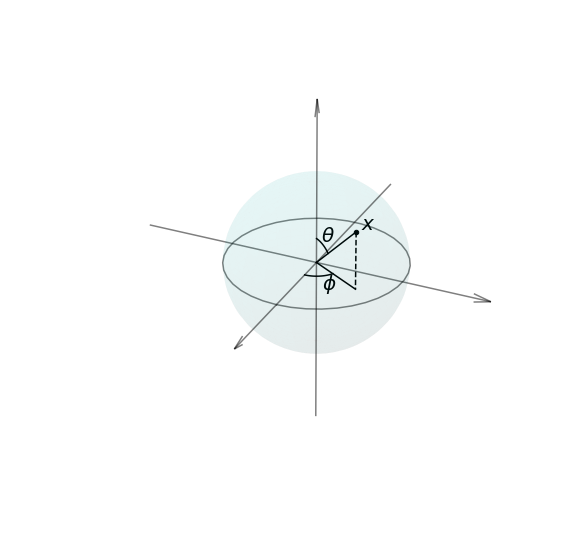

In [180]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=30, azim=25)
ax.axis("off")
# 軸
plot_3axis(ax)

# 球面
ax.plot(x, y, z, alpha=0.5, color="k")
ax.plot_surface(X, Y, Z, alpha=0.05, color="c")

# 球座標
ax.scatter(*x0, color="k")
plot_line(ax, [0, 0, 0], x0)
plot_line(ax, x0, x0_proj, linestyle="--")
plot_line(ax, [0, 0, 0] , x0_proj)
plot_angle_theta(ax, theta0, phi0, r_theta)
plot_angle_phi(ax, np.pi/2, phi0, r_theta)

# 座標
ax.text(*theta0_text, "$ \\theta $", fontsize=fontsize)
ax.text(*phi0_text, "$ \\phi $", fontsize=fontsize)
ax.text(*(x0 + 0.1), "$ x $", fontsize=fontsize)

savefig_pdf(fig, "../data/sp_coord")